<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Linear_Regression_pada_Diabetes_builtin_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regresi linier pada dataset Diabetes (supervised regression)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Data
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [2]:
#  Model (scaling + LR)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [3]:
#  Evaluasi
y_pred = pipe.predict(X_test)
coefs = pipe.named_steps["lr"].coef_

print(f"R^2 Test: {r2_score(y_test, y_pred):.3f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred):.3f}")
print("Jumlah fitur:", coefs.size)

R^2 Test: 0.453
MAE Test: 42.794
Jumlah fitur: 10


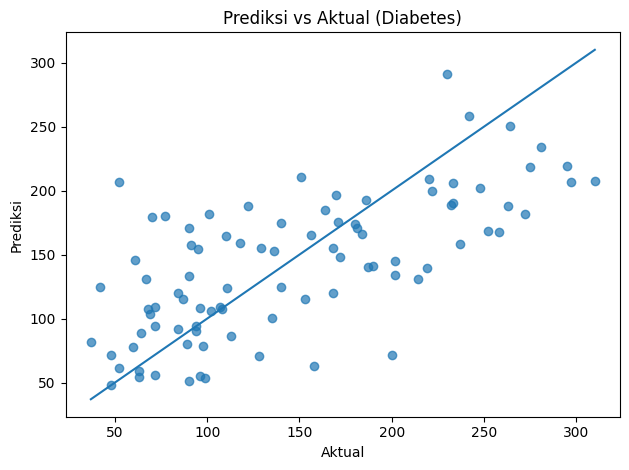

In [4]:
#  Grafik 1 — Prediksi vs Aktual
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
lo, hi = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([lo, hi], [lo, hi])
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Aktual (Diabetes)")
plt.tight_layout()
plt.show()

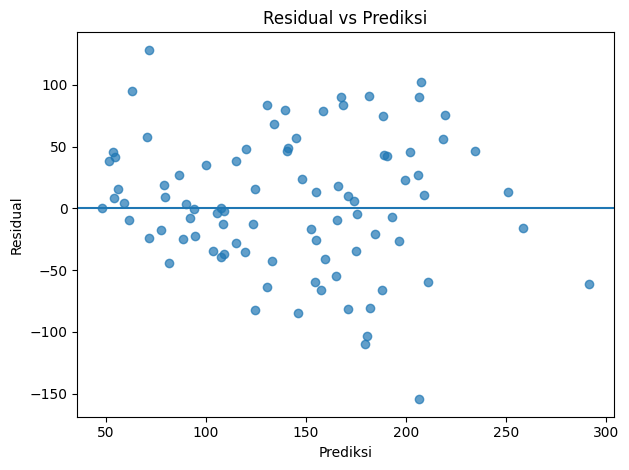

In [5]:
#  Grafik 2 — Residual vs Prediksi
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0)
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi")
plt.tight_layout()
plt.show()